In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
dfvg = pd.read_csv(r'D:\Python\Alex\Files\vgsales.csv')

new_columns = ['job', 'fname', 'location', 'via', 'schedule', 'remote','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                                                # converting the column from string format to date time format
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)                       # converts job_skills from sting to list
#df.dropna(subset=['salyr'],inplace=True)

##### prob 1

###### <pre> compare top 3 jobs among top 6 countries based on median of salary

###### solution

In [3]:
df_1 = df.copy()

top3_jobs = df['job'].value_counts().head(3).index.to_list()                                                     # getting the indexes of top 3 jobs by count to a list
top6_countries = df['country'].value_counts().sort_values(ascending=False).head(6).index.to_list()               # getting the indexes of top 6 countries by count to a list
df_1 = df_1.pivot_table(index='country', values='salyr', columns='job',aggfunc='median')
df_1 = df_1.loc[top6_countries][top3_jobs]                                                                       # filtering row headers with top 6 countries and column headers with top 3 jobs

df_1

job,Data Analyst,Data Engineer,Data Scientist
country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


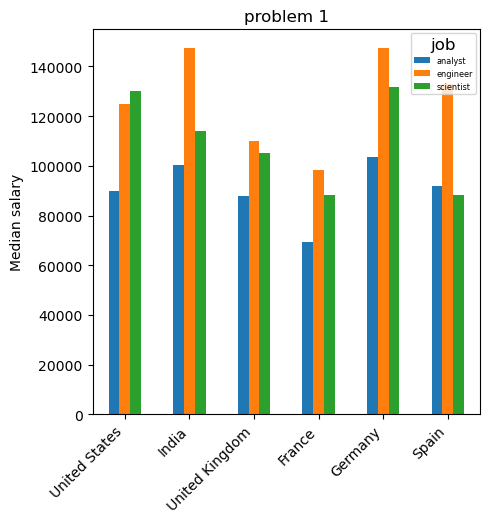

In [4]:
df_1.plot(kind='bar', figsize = (5,5))
plt.title('problem 1')
plt.xlabel('')
plt.ylabel('Median salary')
plt.xticks(rotation = 45, ha = 'right')
plt.legend( ['analyst','engineer','scientist'],title = 'job', loc='upper right', fontsize='xx-small', title_fontsize='large')
plt.show()